In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


importing the necessary data

In [2]:
train_data=pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')

In [3]:
X_train=train_data.drop('Class',axis=1)
y_train=train_data['Class']
X_train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


In [4]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

dropping id for the training

In [5]:
X_train1=X_train.copy()
X_train=X_train.drop('id',axis=1)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


using mutual information to find the information gain needed

In [6]:
discrete_features=list(X_train.columns)
print(discrete_features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


using mutual info classif to find the best features for training the target features

In [7]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X_train,y_train):
    mi_scores = mutual_info_classif(X_train,y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train,y_train)
mi_scores

V14       0.001186
V17       0.001132
V2        0.000984
V3        0.000958
V10       0.000792
V21       0.000791
Amount    0.000728
V7        0.000719
V8        0.000691
V11       0.000672
V1        0.000595
V4        0.000546
V5        0.000536
V18       0.000521
V12       0.000492
V6        0.000485
V16       0.000472
V20       0.000424
V23       0.000406
V28       0.000388
V27       0.000387
V9        0.000247
V22       0.000235
Time      0.000214
V26       0.000083
V25       0.000077
V24       0.000072
V13       0.000071
V15       0.000042
V19       0.000034
Name: MI Scores, dtype: float64

lets try to plot all the mutual information scores and obtain a specific threshold 

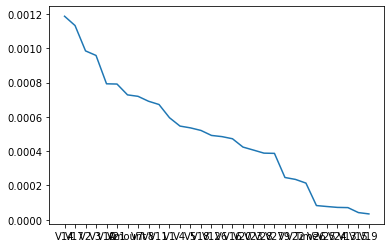

In [8]:
import matplotlib.pyplot as plt
plt.plot(mi_scores.index,mi_scores)

lets select all features above the threshold of 0.001

In [9]:
threshold=0.0006
feature=mi_scores
# Find the indexes of the rows where the feature is greater than the threshold
indexes = feature[feature > threshold].index

In [10]:
print(indexes)

Index(['V14', 'V17', 'V2', 'V3', 'V10', 'V21', 'Amount', 'V7', 'V8', 'V11'], dtype='object')


finding the final training dataset"

In [11]:
X_train_final=X_train[indexes]
X_train_final.head()
X_test_final=test_data[indexes]

scaling training and test data

In [12]:
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_final)

# convert the scaled data back to a pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)

# transform the test data
X_test_scaled = scaler.transform(X_test_final)

# convert the scaled data back to a pandas DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

viewing the scaled datasets

In [13]:
X_train_scaled.head()

,V14,V17,V2,V3,V10,V21,Amount,V7,V8,V11
0,0.542618,-0.496991,-0.153277,-1.526656,0.180730,-0.718199,-0.426937,0.292364,-0.576662,-1.252759
1,-0.264156,-0.419851,-1.120222,-0.982513,1.154090,0.203208,0.116982,-1.102617,-0.138696,0.699288
2,-1.190660,0.800575,0.824427,-0.719888,-0.947362,-0.699333,-0.422228,1.317136,-0.327171,-0.542656
3,0.606976,-0.191776,-0.201150,-1.462031,0.039215,-0.152446,-0.433436,0.049435,-0.258165,0.495227
4,-0.186545,0.078138,-0.189836,0.539876,-0.070249,0.308014,-0.433436,-0.991706,0.586008,1.213209


In [14]:
X_test_scaled.head()

,V14,V17,V2,V3,V10,V21,Amount,V7,V8,V11
0,-2.884393,1.701181,-0.638173,-1.675036,0.316793,0.645192,-0.241453,-0.974097,-0.240939,0.926044
1,-0.789088,0.179392,-1.491439,-1.005833,0.636456,1.358501,0.644189,-1.841196,1.290116,0.123739
2,-0.742928,0.031310,-1.396609,-0.733587,2.027176,-0.237628,-0.333963,-1.901407,-0.061323,0.458077
3,-0.406968,0.090593,-0.880542,-2.233562,-1.442818,-0.116021,0.362216,0.466362,-0.766985,-1.047143
4,0.329516,-1.287038,-1.480516,-0.201699,-0.367594,0.270717,-0.426937,0.205497,-0.277054,0.325501


importing catboost

In [15]:
from catboost import CatBoostClassifier


defining a classifier model

In [16]:
model_cbc=CatBoostClassifier(iterations=100,random_state=42,eval_metric='AUC')

In [17]:
model_cbc.fit(X_train_scaled,y_train)

Learning rate set to 0.5
0:	total: 89.8ms	remaining: 8.89s
1:	total: 116ms	remaining: 5.67s
2:	total: 138ms	remaining: 4.47s
3:	total: 160ms	remaining: 3.84s
4:	total: 185ms	remaining: 3.51s
5:	total: 208ms	remaining: 3.26s
6:	total: 228ms	remaining: 3.02s
7:	total: 248ms	remaining: 2.86s
8:	total: 267ms	remaining: 2.7s
9:	total: 286ms	remaining: 2.57s
10:	total: 305ms	remaining: 2.46s
11:	total: 325ms	remaining: 2.38s
12:	total: 345ms	remaining: 2.31s
13:	total: 362ms	remaining: 2.22s
14:	total: 381ms	remaining: 2.16s
15:	total: 401ms	remaining: 2.11s
16:	total: 419ms	remaining: 2.04s
17:	total: 439ms	remaining: 2s
18:	total: 461ms	remaining: 1.96s
19:	total: 480ms	remaining: 1.92s
20:	total: 503ms	remaining: 1.89s
21:	total: 524ms	remaining: 1.86s
22:	total: 545ms	remaining: 1.82s
23:	total: 564ms	remaining: 1.79s
24:	total: 585ms	remaining: 1.75s
25:	total: 609ms	remaining: 1.73s
26:	total: 628ms	remaining: 1.7s
27:	total: 648ms	remaining: 1.67s
28:	total: 667ms	remaining: 1.63s
29:

predicting values using the fitted model

In [18]:
pred=model_cbc.predict(X_test_scaled)

In [19]:
output=pd.DataFrame({'id':test_data['id'],'Class':pred})
output.to_csv('submission.csv')
print('Submission successful')

Submission successful


In [20]:
output.head()

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0


**first submission.**